# Final Checks for model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')
#tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')

## 1. Use ONLY compliance available columns

In [38]:
df = df[df['compliance'].notna()]

In [39]:
df.shape

(159880, 5)

In [40]:
#Make paid in full also as compliant
df.loc[df['payment_status'] == 'PAID IN FULL', 'compliance'] = 1
df['payment_status'].value_counts()

NO PAYMENT APPLIED         120269
PAID IN FULL                30429
PARTIAL PAYMENT APPLIED      9182
Name: payment_status, dtype: int64

## 2. Encode payment status

## 4. Encode city values > 300

In [ ]:
#df = df.groupby('city').filter(lambda x : len(x) > 300)
#df['city'].value_counts()
#counts = df.city.value_counts()
#counts.to_csv('city100plus.csv')

In [41]:
df['fine_amount'] = df['fine_amount'].fillna(0)
df.shape

(159880, 5)

## 5. Build the actual model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Feature selection is very interesting phase here where by own intuition I have to select the features
#which might give best fit for data at hand

feature_names_tickets = ['ticket_id', 'fine_amount']
X_tickets = df[feature_names_tickets]
#Our target variable is compliance i.e., ticket chances of getting PAID
y_tickets = df['compliance']

#Test size is chosen to get X_test value of 61,001 as the same is provided test data
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, test_size = 0.38153900, random_state = 0)
clf = LogisticRegression(C=100).fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(98879, 2)
(61001, 2)


## 7. Check ROC / AUC

In [47]:
# First we need to load our test dataset
df1 = pd.read_csv(f"D:/Docs/test_1.csv", encoding='mac_roman')
df1.shape

(61001, 3)

In [48]:
#Filter for cities encoding above 300 count
#df1 = df1.groupby('city').filter(lambda x : len(x) > 300)
#counts = df1.city.value_counts()
#counts.to_csv('city_test_300plus.csv')
#Remove any NAN from fine_amount
df1['fine_amount'] = df1['fine_amount'].fillna(0)

#Encode cities
#from sklearn.preprocessing import OrdinalEncoder
#ord_enc = OrdinalEncoder()
#df1["city_code"] = ord_enc.fit_transform(df1[["city"]])
#df1[["city", "city_code"]].head(4)

In [49]:
feature_names_test = ['ticket_id', 'fine_amount']
X_test_new = df1[feature_names_test]
print(X_test.shape)
print(X_test_new.shape)

(61001, 2)
(61001, 2)


<ipython-input-51-07d25ada025d>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


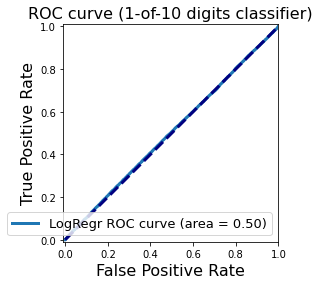

In [51]:
from sklearn.metrics import roc_curve, auc
y_score_lr = clf.decision_function(X_test_new)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()